In [1]:
import numpy as np

# some_file.py
import sys
sys.path.insert(0, '../src/easyesn/')

In [2]:
from easyesn import ESNOptimizer
from easyesn import PredictionESN
from easyesn import GridSearchOptimizer
from easyesn import helper as hlp
import matplotlib.pyplot as plt


Using Numpy backend.


In [3]:
inputLength = 1000
data = np.sin(np.linspace(0, 4*np.pi, inputLength)).reshape(-1,1)
targetData = np.roll(data, -1)

inputData = data[:int(inputLength*0.7)]
validationData = data[int(inputLength*0.3):]

inputTarget = targetData[:int(inputLength*0.7)]
validationTarget = targetData[int(inputLength*0.3):]

In [4]:
esn = PredictionESN(n_input=1, n_output=1, n_reservoir=50, regression_parameters=[1e-2], solver="lsqr")

In [5]:
opt = ESNOptimizer()

In [10]:
validationLosses, fitLosses, spectralRadiuses, leakingRates, inputScalings = opt.optimizeParameterForTrainError(esn, inputData, inputTarget, validationData, validationTarget, learningRate=0.03,transientTime = 100, epochs=20)

###################### Start epoch: 0 ##########################
###################### Start epoch: 1 ##########################
###################### Start epoch: 2 ##########################
###################### Start epoch: 3 ##########################
###################### Start epoch: 4 ##########################
###################### Start epoch: 5 ##########################
###################### Start epoch: 6 ##########################
###################### Start epoch: 7 ##########################
###################### Start epoch: 8 ##########################
###################### Start epoch: 9 ##########################
###################### Start epoch: 10 ##########################
###################### Start epoch: 11 ##########################
###################### Start epoch: 12 ##########################
###################### Start epoch: 13 ##########################
###################### Start epoch: 14 ##########################
####################

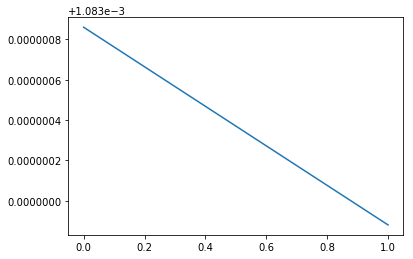

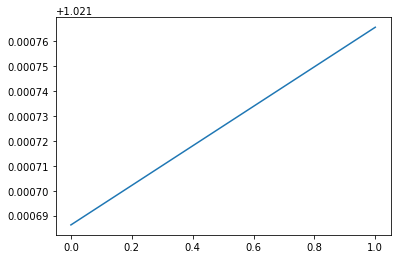

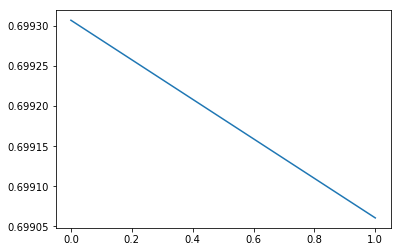

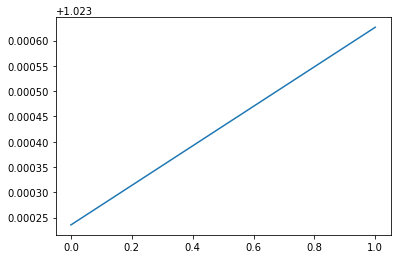

In [11]:
plt.plot(fitLosses)
plt.show()
plt.plot(spectralRadiuses)
plt.show()
plt.plot(leakingRates)
plt.show()
plt.plot(inputScalings)
plt.show()


In [14]:
from easyesn import MinimalReservoirExample
reservoir = MinimalReservoirExample.Reservoir(1,1,25, density=1, spectralRadius=0.76, leakingRate=1.09, inputScaling=0.1, transientTime=transientTime)
print("#################################################")
evaLoss, fitLoss, evaLosses, fitLosses, inputScalings, leakingRates, spectralRadiuses = reservoir.optimizeParameterForTrainError(inputData, inputTarget, inputData.shape[0], learningRate = 0.02, epochs = 100, errorEvaluationLength=inputLength*0.3, penalty=1e-2)
#evaLoss, fitLoss, evaLosses, fitLosses, inputScalings, leakingRates, spectralRadiuses = reservoir.optimizeParameterForEvaluationError(data, targetData, trainTime, evaTime, epochs = 30, learningRate = 0.01, penalty=penalty)


In [ ]:
param_grid = {"leakingRate": np.linspace(0.01,1.2, 10), "spectralRadius":np.linspace(0.01,1.2,10)}
fixed_params = {"n_reservoir":50, "n_input":1, "n_output":1}
gopt = GridSearchOptimizer(param_grid, fixed_params, PredictionESN)
results = gopt.fit(inputData, inputTarget, [(validationData, validationTarget)])

In [ ]:
plt.imshow(results)
plt.show()

In [ ]:
def generateGrid(reservoir, N, fromSpectralR, tillSpectralR, fromLeakyR, tillLeakyR, transientTime, trainInputs, trainTargets, validationInputs, validationTargets):
    grid1 = np.zeros((N,N))
    grid2 = np.zeros((N,N))
    widthSprctralRadius = (tillSpectralR - fromSpectralR)/N
    widthLeakingRate = (tillLeakyR - fromLeakyR)/N
    for i in range(N):
        sR = i*widthSprctralRadius + fromSpectralR
        reservoir.setSpectralRadius(sR)
        for j in range(N):
            lR = j*widthLeakingRate + fromLeakyR
            reservoir.setLeakingRate(lR)
            
            grid1[i,j] = reservoir.fit(trainInputs, trainTargets, transientTime=transientTime)
            grid2[i,j] = hlp.loss( reservoir.predict(validationInputs), validationTargets )

    return grid1, grid2

In [ ]:
grid1, grid2 = generateGrid(esn, 10, 0.1, 1.2, 0.1, 1.2, 100, inputData, inputTarget, validationData, validationTarget)

In [ ]:
plt.imshow(grid1)
plt.show()